In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pprint
import py2cytoscape.cytoscapejs as renderer
import random
import requests
import sys

from py2cytoscape.data.cyrest_client import CyRestClient
from pyvis.network import Network

<IPython.core.display.Javascript object>

In [2]:
#args = sys.argv[1:]

seed = 7

random.seed(seed)

graph_size = 500
graph_size_range = graph_size / 2

edge_num_limit = 2
hub_edge_num_min = edge_num_limit * 2
hub_edge_num_max = edge_num_limit * 3
hub_node_prob = 0.1

num_v = random.randrange(graph_size - graph_size_range, graph_size + graph_size_range)

g_orig = nx.MultiDiGraph()

num_i_hub = 0
num_o_hub = 0

i_hub_color = 'blue'
o_hub_color = 'grey'
io_hub_color = 'red'
other_color = 'grey'

for i in range(num_v):
    i_hub = False
    o_hub = False
    if random.random() < hub_node_prob:
        i_hub = True
        #num_i_hub += 1
    g_orig.add_node(i, i_hub=i_hub)

for x in g_orig:
    tmp = []
    e_min = 1
    e_max = edge_num_limit
    for i in range(random.randrange(e_min, e_max)):
        y = random.randrange(0, num_v)
        if x != y and y not in tmp:
            tmp.append(y)
            g_orig.add_edge(x,y)

for y in g_orig:
    if not g_orig.nodes[y]['i_hub']:
        continue
    for i in range(edge_num_limit):
        x = random.randrange(0, num_v)
        if g_orig.has_edge(x,y):
            continue
        if x == y:
            continue
        g_orig.add_edge(x,y)

for i in g_orig:

    i_node_num = len(list(g_orig.predecessors(i)))
    o_node_num = len(list(g_orig.neighbors(i)))

    n = g_orig.nodes[i]

    if hub_edge_num_min <= i_node_num:
        n['color'] = i_hub_color
        num_i_hub += 1
        n['i_hub'] = True
    else:
        n['color'] = other_color
        n['i_hub'] = False

for e in g_orig.edges.data():
    x = e[0]
    y = e[1]
    attr = e[2]

    if g_orig.nodes[y]['i_hub']:
        attr['color'] = i_hub_color
    else:
        attr['color'] = other_color

print('Number of Nodes: ' + str(g_orig.number_of_nodes()))
print('Number of Edges: ' + str(g_orig.number_of_edges()))
print('Number of in-hub: ' + str(num_i_hub))

Number of Nodes: 415
Number of Edges: 502
Number of in-hub: 17


In [3]:
net_orig = Network(directed=True, notebook=True, height='700px', width = '100%')

net_orig.from_nx(g_orig)

net_orig.show('graph_orig.html')

In [4]:
g_upd8 = g_orig.copy(as_view=False)

list_i_hub = []
for i in g_upd8:
    if g_upd8.nodes[i]['i_hub']:
        list_i_hub.append(i) 

for x in list_i_hub:
    for y in list_i_hub:
        if x == y: continue
        if nx.has_path(g_upd8, x, y):
            g_upd8.add_edge(x, y, color='red')
        #else:
        #    print(f"Not Found: {x} -> {y}")

Not Found: 0 -> 12
Not Found: 0 -> 126
Not Found: 0 -> 226
Not Found: 1 -> 12
Not Found: 1 -> 126
Not Found: 1 -> 226
Not Found: 12 -> 126
Not Found: 12 -> 226
Not Found: 39 -> 12
Not Found: 39 -> 126
Not Found: 39 -> 226
Not Found: 44 -> 12
Not Found: 44 -> 126
Not Found: 44 -> 226
Not Found: 99 -> 12
Not Found: 99 -> 126
Not Found: 99 -> 226
Not Found: 118 -> 12
Not Found: 118 -> 126
Not Found: 118 -> 226
Not Found: 126 -> 12
Not Found: 126 -> 226
Not Found: 196 -> 12
Not Found: 196 -> 126
Not Found: 196 -> 226
Not Found: 213 -> 12
Not Found: 213 -> 126
Not Found: 213 -> 226
Not Found: 226 -> 12
Not Found: 226 -> 126
Not Found: 235 -> 12
Not Found: 235 -> 126
Not Found: 235 -> 226
Not Found: 242 -> 12
Not Found: 242 -> 126
Not Found: 242 -> 226
Not Found: 280 -> 12
Not Found: 280 -> 126
Not Found: 280 -> 226
Not Found: 281 -> 12
Not Found: 281 -> 126
Not Found: 281 -> 226
Not Found: 377 -> 12
Not Found: 377 -> 126
Not Found: 377 -> 226
Not Found: 410 -> 12
Not Found: 410 -> 126
Not F

In [5]:
net_upd8 = Network(directed=True, notebook=True, height='700px', width = '100%')
net_upd8.from_nx(g_upd8)
net_upd8.show('graph_upd8.html')

In [13]:
def calc_path_length_average(_g, _nx):
    sum_len = 0
    min_len = 99999999
    max_len = 0
    count = 0
    len_array = []
    for x in _g:
        for y in _g:
            if x == y: continue
            if _nx.has_path(_g, x, y):
                path = _nx.shortest_path(_g, x, y)
                tmp_len = len(path)
                len_array.append(tmp_len)
                if max_len < tmp_len: max_len = tmp_len
                if tmp_len < min_len: min_len = tmp_len
                sum_len += tmp_len
                count += 1
    return max_len, min_len, (sum_len / count), len_array

path_length_max_orig, path_length_min_orig, path_length_ave_orig, hist_orig = calc_path_length_average(g_orig, nx)
path_length_max_upd8, path_length_min_upd8, path_length_ave_upd8, hist_upd8 = calc_path_length_average(g_upd8, nx)

Path Length Max Orig: 51
Path Length Min Orig: 2
Path Length Ave Orig: 18.858299670855775
Path Length Max Upd8: 34
Path Length Min Upd8: 2
Path Length Ave Upd8: 10.692698982645123


(array([7.220e+02, 1.649e+03, 0.000e+00, 2.538e+03, 3.359e+03, 0.000e+00,
        3.851e+03, 4.257e+03, 0.000e+00, 4.310e+03, 4.250e+03, 0.000e+00,
        4.058e+03, 0.000e+00, 3.675e+03, 3.275e+03, 0.000e+00, 2.964e+03,
        2.699e+03, 0.000e+00, 2.336e+03, 2.003e+03, 0.000e+00, 1.718e+03,
        0.000e+00, 1.396e+03, 1.102e+03, 0.000e+00, 8.830e+02, 7.040e+02,
        0.000e+00, 5.280e+02, 3.770e+02, 0.000e+00, 2.710e+02, 1.930e+02,
        0.000e+00, 1.300e+02, 0.000e+00, 8.200e+01, 5.800e+01, 0.000e+00,
        3.600e+01, 2.300e+01, 0.000e+00, 1.300e+01, 8.000e+00, 0.000e+00,
        3.000e+00, 1.000e+00]),
 array([ 2.  ,  2.64,  3.28,  3.92,  4.56,  5.2 ,  5.84,  6.48,  7.12,
         7.76,  8.4 ,  9.04,  9.68, 10.32, 10.96, 11.6 , 12.24, 12.88,
        13.52, 14.16, 14.8 , 15.44, 16.08, 16.72, 17.36, 18.  , 18.64,
        19.28, 19.92, 20.56, 21.2 , 21.84, 22.48, 23.12, 23.76, 24.4 ,
        25.04, 25.68, 26.32, 26.96, 27.6 , 28.24, 28.88, 29.52, 30.16,
        30.8 , 31.44,

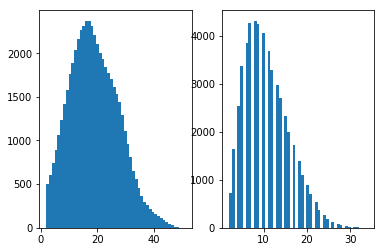

In [15]:
print(f'Path Length Max Orig: {path_length_max_orig}')
print(f'Path Length Min Orig: {path_length_min_orig}')
print(f'Path Length Ave Orig: {path_length_ave_orig}')

print(f'Path Length Max Upd8: {path_length_max_upd8}')
print(f'Path Length Min Upd8: {path_length_min_upd8}')
print(f'Path Length Ave Upd8: {path_length_ave_upd8}')

fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.hist(hist_orig, bins=50)
fig.add_subplot(1, 2, 2)
plt.hist(hist_upd8, bins=50)

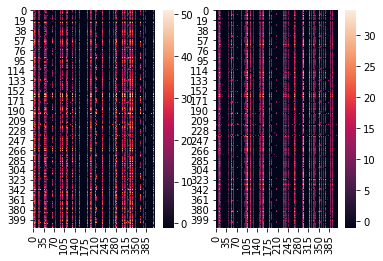

In [23]:
import pandas as pd
import seaborn as sns

def calc_path_length(_g, _nx):
    sum_len = 0
    min_len = 99999999
    max_len = 0
    count = 0
    node_num = _g.number_of_nodes()
    len_array = np.arange(node_num * node_num).reshape(node_num, node_num)
    for x in _g:
        for y in _g:
            if x == y:
                len_array[x][y] = 0
                continue
            if _nx.has_path(_g, x, y):
                path = _nx.shortest_path(_g, x, y)
                tmp_len = len(path)
                len_array[x][y] = tmp_len
            else:
                len_array[x][y] = -1
    return len_array

path_len_matrix_orig = calc_path_length(g_orig, nx)
path_len_matrix_upd8 = calc_path_length(g_upd8, nx)

fig = plt.figure()
fig.add_subplot(1, 2, 1)
sns.heatmap(path_len_matrix_orig)
fig.add_subplot(1, 2, 2)
sns.heatmap(path_len_matrix_upd8)

plt.show()

In [16]:
source = 1
target = 108

def search_path(g, source, target):
    if nx.has_path(g, source, target):
        path = nx.shortest_path(g, source, target)
        print(path)
    else:
        print(f"No path: {source} -> {target}")

print('original:')
search_path(g_orig, source, target)
print('update:')
search_path(g_upd8, source, target)

original:
No path: 1 -> 108
update:
No path: 1 -> 108
